## Q2 


In [6]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

# Redefining the parameters and variables for the plot
mean_true_talent = -2
std_true_talent = 1
mean_noise = 0
std_noise = 2
x_min = 0

# Generate points for true talent and noise distributions
true_talent_points = np.linspace(mean_true_talent - 3*std_true_talent, mean_true_talent + 3*std_true_talent, 1000)
realized_points = np.linspace(mean_true_talent - 3*(std_true_talent + std_noise), mean_true_talent + 3*(std_true_talent + std_noise), 1000)

# CDF for the true talent distribution and the combined performance distribution
cdf_true_talent = norm.cdf(true_talent_points, loc=mean_true_talent, scale=std_true_talent)
cdf_performance = norm.cdf(realized_points, loc=mean_true_talent + mean_noise, scale=np.sqrt(std_true_talent**2 + std_noise**2))

# Area calculations
area_performance_above_0 = norm.sf(x_min, loc=mean_true_talent + mean_noise, scale=np.sqrt(std_true_talent**2 + std_noise**2))
area_true_talent_above_0 = norm.sf(x_min, loc=mean_true_talent, scale=std_true_talent)
area_performance_above_0_given_true_talent_above_0 = norm.sf(x_min, loc=0, scale=std_noise)

# Applying Bayes' theorem for the percentage
percentage = (area_performance_above_0_given_true_talent_above_0 * area_true_talent_above_0) / area_performance_above_0
percentage


0.06130568157938404

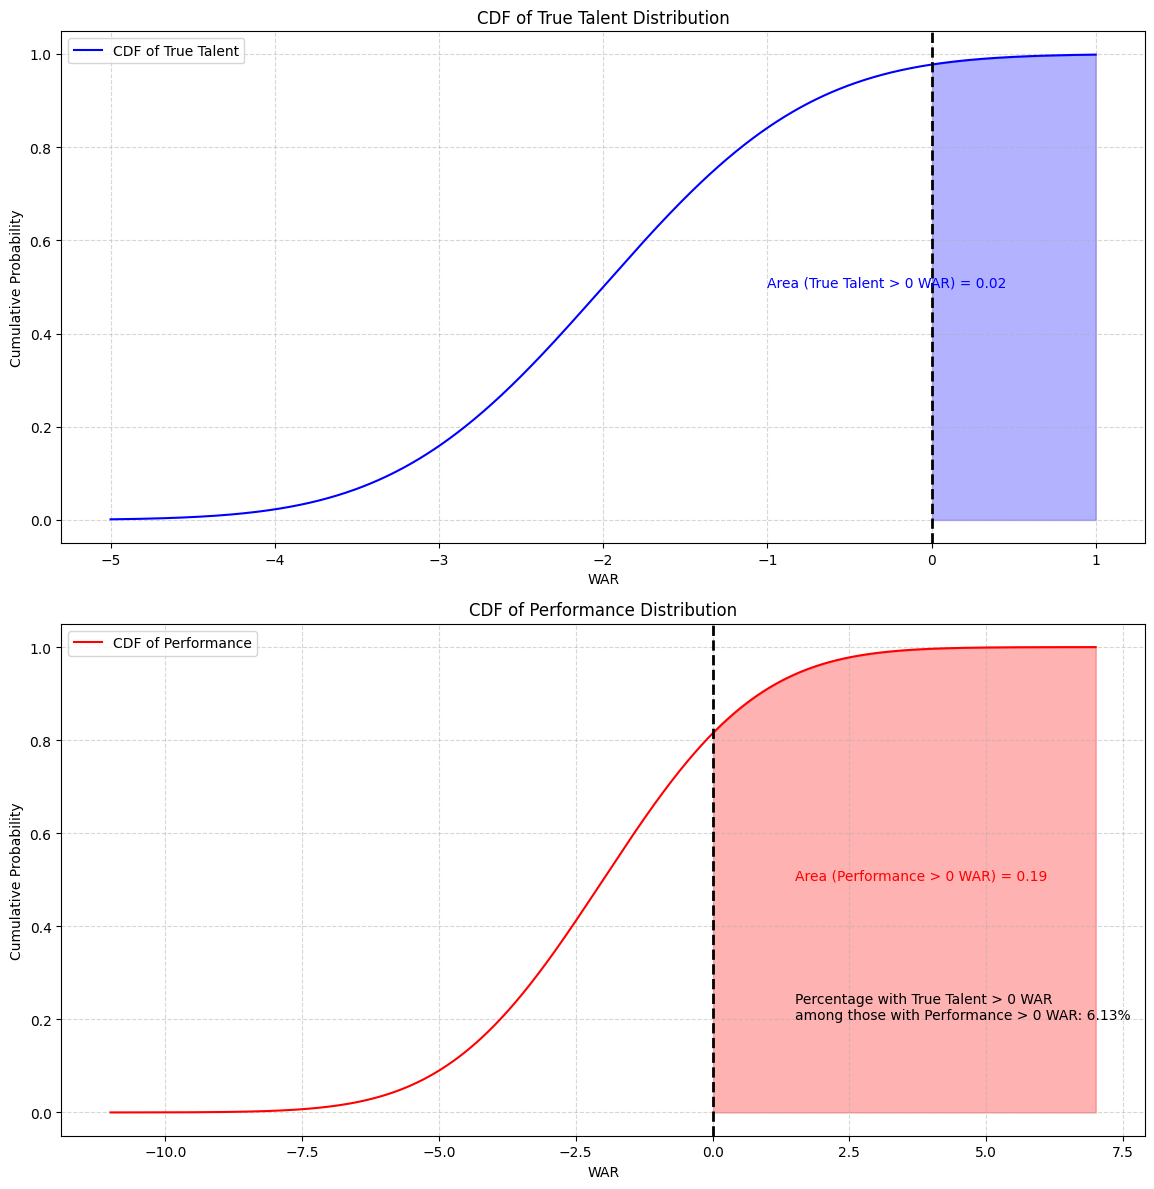

In [7]:

# Plotting the enhanced visualizations
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# CDF for True Talent Distribution
ax1.plot(true_talent_points, cdf_true_talent, label='CDF of True Talent', color='blue')
ax1.fill_between(true_talent_points, 0, cdf_true_talent, where=(true_talent_points > 0), color='blue', alpha=0.3)
ax1.set_title('CDF of True Talent Distribution')
ax1.set_xlabel('WAR')
ax1.set_ylabel('Cumulative Probability')
ax1.axvline(x=0, color='black', linestyle='--', linewidth=2)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend()

# CDF for Combined Performance Distribution
ax2.plot(realized_points, cdf_performance, label='CDF of Performance', color='red')
ax2.fill_between(realized_points, 0, cdf_performance, where=(realized_points > 0), color='red', alpha=0.3)
ax2.set_title('CDF of Performance Distribution')
ax2.set_xlabel('WAR')
ax2.set_ylabel('Cumulative Probability')
ax2.axvline(x=0, color='black', linestyle='--', linewidth=2)
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.legend()

# Annotations
ax1.text(-1, 0.5, f'Area (True Talent > 0 WAR) = {area_true_talent_above_0:.2f}', color='blue')
ax2.text(1.5, 0.5, f'Area (Performance > 0 WAR) = {area_performance_above_0:.2f}', color='red')
ax2.text(1.5, 0.2, f'Percentage with True Talent > 0 WAR\namong those with Performance > 0 WAR: {percentage:.2%}', color='black')

plt.tight_layout()
plt.show()

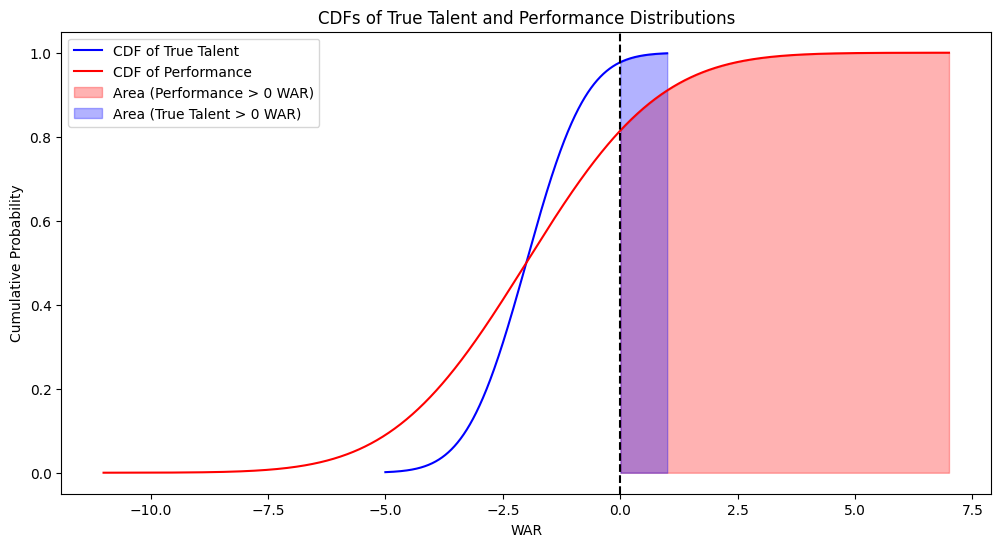

In [8]:

# Plotting the CDFs
plt.figure(figsize=(12, 6))

# CDF for True Talent Distribution
plt.plot(true_talent_points, cdf_true_talent, label='CDF of True Talent', color='blue')

# CDF for Combined Performance Distribution
plt.plot(realized_points, cdf_performance, label='CDF of Performance', color='red')

# Highlight the area under the curve for performance above 0 WAR
plt.fill_between(realized_points, 0, cdf_performance, where=(realized_points > 0), color='red', alpha=0.3, label='Area (Performance > 0 WAR)')

# Highlight the area under the curve for true talent above 0 WAR
plt.fill_between(true_talent_points, 0, cdf_true_talent, where=(true_talent_points > 0), color='blue', alpha=0.3, label='Area (True Talent > 0 WAR)')

# Labels and title
plt.xlabel('WAR')
plt.ylabel('Cumulative Probability')
plt.title('CDFs of True Talent and Performance Distributions')
plt.axvline(x=0, color='black', linestyle='--')
plt.legend()

# Show plot
plt.show()
